# Ridge and Lasso Regression

 Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.




In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#L2
from sklearn.linear_model import Ridge
#L1
from sklearn.linear_model import Lasso

## load DataSet

In [12]:
#boston = datasets.load_boston()
#boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df = pd.read_csv("boston_house_prices.csv", header=1)
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 波士頓房價

檔案中包含506條樣本資料，即有506條房價資料，而13表示有13個影響房價的特徵值
特徵值解釋如下表
![波士頓房價檔案部分中英文標題](images/boston_1.png)

In [14]:
print("資料包內含資料的key值：", boston_df.keys())
#print("資料欄位名稱(資料特徵參數)：",boston.feature_names)
print("資料欄位名稱(資料特徵參數)：", list(boston_df.columns[:-1]))
#print("檔案位置:",boston['filename'])
#print("第一筆資料:",boston.data[:1])
print("第一筆資料:\n", boston_df.iloc[0, :-1].values.reshape(1, -1))
#print("資料型別:",type(boston.data))
print("資料型別:", type(boston_df.iloc[:, :-1].values))

#target_names = boston.target
#print("資料size:",boston['data'].size)
#print("前10筆target_names(房價): ", boston['target'][:10])
#print(boston.target)
target = boston_df['MEDV'].values
print("資料 size:", boston_df.iloc[:, :-1].values.size)
print("前10筆 target (房價):", target[:10])

#組成 pandas DataFrame (資料表的方式顯示)
#x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
x = boston_df.drop(columns=["MEDV"])
print("pandas DataFrame\n",x.head(5),sep='')

資料包內含資料的key值： Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
資料欄位名稱(資料特徵參數)： ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
第一筆資料:
 [[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]
資料型別: <class 'numpy.ndarray'>
資料 size: 6578
前10筆 target (房價): [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
pandas DataFrame
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.06

In [18]:
import pandas as pd
#x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
#y = pd.DataFrame(boston['target'],columns=['target'])
# 取出特徵欄位的數值，指定欄位名稱（除了最後一欄 MEDV）
x = pd.DataFrame(boston_df.drop(columns='MEDV').values, columns=boston_df.columns[:-1])

# 取出目標欄位（房價）作為1D array，重新命名為 target 欄位，可以與原本方式一致，維持使用pd.DataFrame方式
y = pd.DataFrame(boston_df['MEDV'].values, columns=['target'])

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

print(len(X_train), len(y_train))

152 152
354 354


In [19]:
x.shape

(506, 13)

## Create a Ridge Regression
       shrinking coefficient magnitude using Ridge regression
       
###   Ridge (L2 norm)
![image.png](https://miro.medium.com/max/1374/1*hAGhQehrqAmT1pvz3q4t8Q.png)
 
![image.png](https://miro.medium.com/max/670/1*sC4KLMHU0j_1gR3VmlgGtg.png)


In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("Score越大越好")
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
# Score越大越好，Train比Test高

Score越大越好
linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576834
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123906
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921935


In [26]:
rr.coef_

array([-1.28869508e-01,  4.62616037e-02, -5.46734649e-02,  3.82991200e+00,
       -1.23346502e+01,  3.72939688e+00,  7.27044718e-03, -1.19369533e+00,
        2.79812365e-01, -7.75637125e-03, -8.25725742e-01,  1.25406308e-02,
       -5.56819788e-01])

In [30]:
type(rr.coef_)


numpy.ndarray

In [31]:
np.ravel(rr.coef_)

array([-1.28869508e-01,  4.62616037e-02, -5.46734649e-02,  3.82991200e+00,
       -1.23346502e+01,  3.72939688e+00,  7.27044718e-03, -1.19369533e+00,
        2.79812365e-01, -7.75637125e-03, -8.25725742e-01,  1.25406308e-02,
       -5.56819788e-01])


### $\alpha$ 愈小則等同於Linear Regression; $\alpha$ 愈大則會限制$\omega$ 的值。<br>這將使得在一定iteration下不一定能找到最低值, 即loss是增加的

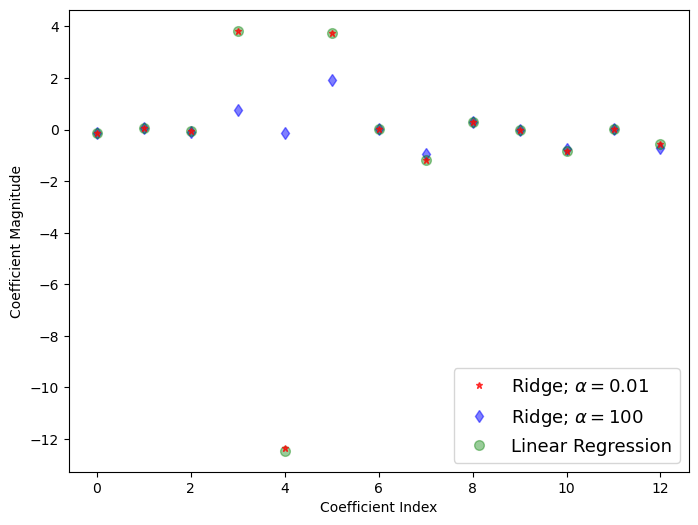

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(np.ravel(rr.coef_),alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers # zorder for ordering the markers
plt.plot(np.ravel(rr100.coef_),alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(np.ravel(lr.coef_),alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(fontsize=13,loc=4)
plt.show()

## Create a Lasso Regression


### Lasso (L1 norm)
 ![image.png](https://miro.medium.com/max/1402/1*P5Lq5mAi4WAch7oIeiS3WA.png)
 
 ![image.png](https://miro.medium.com/max/949/1*JH9eAS2I9mwOpuFLg-gD6g.png)


In [34]:
lasso = Lasso(alpha=1) #default alpha=1
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print("test score: ", test_score)
#Lasso(alpha=0.01)
print("number of features used: ", coeff_used)
print(lasso)

training score: 0.6832133784853487
test score:  0.636446266236206
number of features used:  11
Lasso(alpha=1)


In [35]:
lasso.coef_

array([-0.08154377,  0.05590332, -0.03322822,  0.        , -0.        ,
        0.73410469,  0.03225416, -0.52412342,  0.24767785, -0.01075051,
       -0.64540215,  0.01017496, -0.81504887])

In [37]:
#Lasso(alpha=0.01)
lasso001 = Lasso(alpha=0.01, max_iter=1000000)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001 )
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
print('-'*20)
#Lasso(alpha=0.0001)
lasso00001 = Lasso(alpha=0.0001, max_iter=1000000)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

#LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print('-'*20)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

training score for alpha=0.01: 0.7414845253242521
test score for alpha =0.01:  0.7096270988778384
number of features used: for alpha =0.01: 13
--------------------
training score for alpha=0.0001: 0.7419034541315459
test score for alpha =0.0001:  0.7147428283500776
number of features used: for alpha =0.0001: 13
--------------------
LR training score: 0.7419034960343789
LR test score:  0.7147895265576834



### $\alpha$=0.01 會比$\alpha$=0.1 使$\omega$ 更小<br> 若$\omega$ 很小等於Linear regression 這將使得在一定iteration下不一定能找到最低值, 即loss是增加的

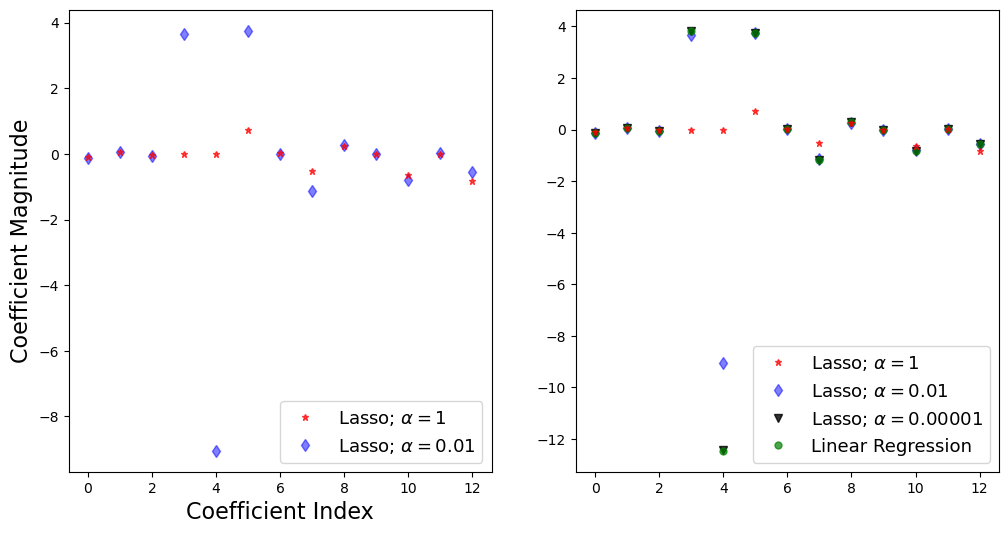

In [38]:
plt.figure(figsize=(12, 6),)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(np.ravel(lr.coef_),alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.legend(fontsize=13,loc=4)

plt.show()

愈高維度時, Lassso 愈有機會只使用部份特徵(部份切面)來找到低點, 而Ridge像球體一樣無法只用部份特徵才找到最低點

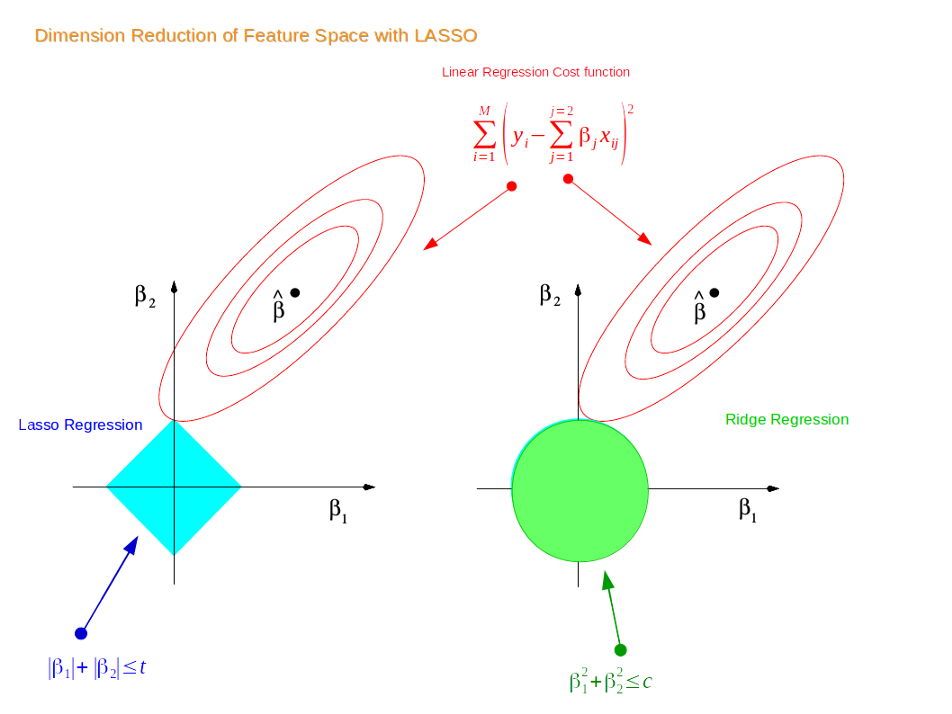

## R2 Score 

In [39]:
from sklearn.metrics import r2_score
#R2 square
r2_score(y_test,rr100.predict(X_test))

0.6805765856921935